In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nam = ['Id','Clamp Thickness','Uniformity of cell size','Uniformity of cell shape','Marginal Ashesion','Single Epithelial cell size',
       'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
dataset = pd.read_csv("breast_cancer.csv",names = nam)
dataset.head()

,Id,Clamp Thickness,Uniformity of cell size,Uniformity of cell shape,Marginal Ashesion,Single Epithelial cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
dataset.describe(include = 'all')

,Id,Clamp Thickness,Uniformity of cell size,Uniformity of cell shape,Marginal Ashesion,Single Epithelial cell size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [4]:
dataset['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

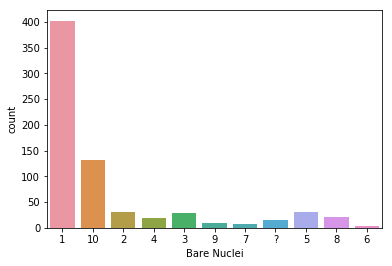

In [5]:
sns.countplot(data = dataset, x = 'Bare Nuclei')

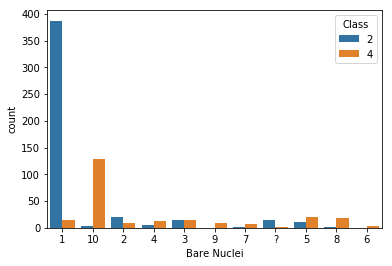

In [6]:
sns.countplot(data = dataset, x = 'Bare Nuclei', hue = 'Class')

In [7]:
x = dataset.drop(['Class'],axis = 1)
y = dataset['Class']

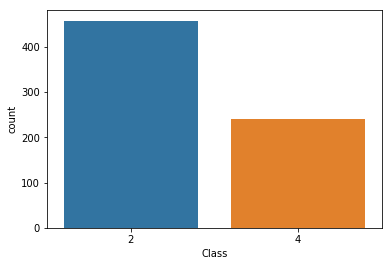

In [8]:
sns.countplot(data = x, x = y)

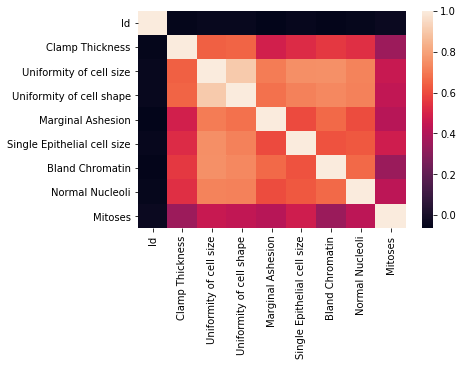

In [9]:
x_subset = x.drop(['Bare Nuclei'], axis = 1)
sns.heatmap(x_subset.corr())#CORELATION IS CALCULATED
#where ever there is white in mitoses , the person is declared cancer

In [10]:
#x['Bare Nuclei'].replace('?',1,inplace = False)
#print(x)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
x_sc = sc.fit_transform(x_subset)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()#Lable values of 0 and 1 is converted into names
y = lbl_encoder.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [14]:
clumn_thickness = tf.feature_column.numeric_column('Clump Thickness')
uniformity_cell_size= tf.feature_column.numeric_column('Uniformity of cell size')
uniformity_cell_shape= tf.feature_column.numeric_column('Uniformity of cell shape')
marginal= tf.feature_column.numeric_column('Marginal Ashesion')
single_epithelial_cell_size= tf.feature_column.numeric_column('Single Epithelial cell size')

bland_chromatin= tf.feature_column.numeric_column('Bland Chromatin')
normal_nucleoli= tf.feature_column.numeric_column('Normal Nucleoli')
mitoses= tf.feature_column.numeric_column('Mitoses')


In [15]:
import math 
embedding_size = 11**0.25#error margin in data 11^0.25

In [16]:
Bare_Nuclei = tf.contrib.layers.sparse_column_with_hash_bucket('Bare Nuclei',hash_bucket_size = 20)

W0701 10:24:51.625454 15664 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [17]:
Bare_Nuclei = tf.contrib.layers.embedding_column(sparse_id_column = Bare_Nuclei, dimension = 2)#layer which is formed is of 2 dimesion
#the error shows the new version and way of implementing it

W0701 10:24:51.633431 15664 feature_column.py:1091] The default stddev value of initializer was changed from "1/sqrt(vocab_size)" to "1/sqrt(dimension)" in core implementation (tf.feature_column.embedding_column).


In [18]:
feature_col = [clumn_thickness,uniformity_cell_size,uniformity_cell_shape,marginal,
               single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,Bare_Nuclei]

In [19]:
def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices(dict(x_train),y_train)
    dataset = dataset.shuffle(1000).repeat().batch(10)
    return dataset

In [20]:
def eval_train_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_test),y_test))
    dataset = dataset.shuffle(1000).repeat().batch(10)
    return dataset

In [21]:
optimizer_adam = tf.train.AdamOptimizer(learning_rate = 0.01)

In [22]:
model = tf.estimator.DNNClassifier([9,9,3], feature_columns = feature_col, optimizer = optimizer_adam)

W0701 10:24:51.697265 15664 estimator.py:1811] Using temporary folder as model directory: C:\Users\vaibhav\AppData\Local\Temp\tmpp8xega26


In [24]:
model.train(input_fn = lambda: train_input_fn(x_train,y_train,10),steps = 2000)

TypeError: from_tensor_slices() takes 1 positional argument but 2 were given

In [25]:
eval_results = model.evaluate(input_fn = eval_train_fn,steps = 1)

W0701 10:25:43.259287 15664 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


ValueError: in converted code:
    relative to C:\ProgramData\Anaconda3\lib:

    site-packages\tensorflow_estimator\python\estimator\canned\dnn.py:250 call *
        net = self._input_layer(features)
    site-packages\tensorflow\python\feature_column\feature_column.py:337 __call__
        from_template=True)
    site-packages\tensorflow\python\ops\template.py:392 __call__
        return self._call_func(args, kwargs)
    site-packages\tensorflow\python\ops\template.py:354 _call_func
        result = self._func(*args, **kwargs)
    site-packages\tensorflow\python\feature_column\feature_column.py:226 _internal_input_layer
        return _get_logits()
    site-packages\tensorflow\python\feature_column\feature_column.py:201 _get_logits
        None, default_name=column._var_scope_name):  # pylint: disable=protected-access
    site-packages\tensorflow\python\ops\variable_scope.py:2222 __enter__
        return self._enter_scope_uncached()
    site-packages\tensorflow\python\ops\variable_scope.py:2322 _enter_scope_uncached
        current_name_scope_name = current_name_scope.__enter__()
    site-packages\tensorflow\python\framework\ops.py:6513 __enter__
        return self._name_scope.__enter__()
    contextlib.py:112 __enter__
        return next(self.gen)
    site-packages\tensorflow\python\framework\ops.py:4307 name_scope
        raise ValueError("'%s' is not a valid scope name" % name)

    ValueError: 'Bare Nuclei_embedding' is not a valid scope name
    
    originally defined at:
      File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\dnn.py", line 106, in dnn_logit_fn
        name='dnn')
      File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\dnn.py", line 189, in __init__
        create_scope_now=False)
      File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\feature_column\feature_column.py", line 327, in __init__
        self._name, _internal_input_layer, create_scope_now_=create_scope_now)
      File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\template.py", line 160, in make_template
        **kwargs)
    


In [ ]:
print(x_train)